In [ ]:
# https://www.kaggle.com/c/santander-product-recommendation/overview

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")
sample_submission = pd.read_csv("./sample_submission.csv")

c:\users\administrator\basic\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (5,8,11,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
c:\users\administrator\basic\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
sample_submission.tail()

,ncodpers,added_products
929610,1553685,ind_tjcr_fin_ult1
929611,1553686,ind_tjcr_fin_ult1
929612,1553687,ind_tjcr_fin_ult1
929613,1553688,ind_tjcr_fin_ult1
929614,1553689,ind_tjcr_fin_ult1


In [12]:
train.tail()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
13647304,2016-05-28,1166765,N,ES,V,22,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647305,2016-05-28,1166764,N,ES,V,23,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647306,2016-05-28,1166763,N,ES,H,47,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647307,2016-05-28,1166789,N,ES,H,22,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647308,2016-05-28,1550586,N,ES,H,37,2016-05-13,1.0,0,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [13]:
test.tail()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento
929610,2016-06-28,660237,N,ES,V,55,1999-04-21,0,206,1,...,N,NaN,KAT,N,1,28.0,MADRID,1,128643.57,01 - TOP
929611,2016-06-28,660238,N,ES,V,30,2006-11-29,0,115,1,...,N,NaN,KFC,N,1,26.0,"RIOJA, LA",0,NA,02 - PARTICULARES
929612,2016-06-28,660240,N,ES,V,52,2006-11-29,0,115,1,...,N,NaN,KBZ,N,1,33.0,ASTURIAS,1,72765.27,02 - PARTICULARES
929613,2016-06-28,660243,N,ES,V,32,2006-11-29,0,115,1,...,N,NaN,KFC,N,1,33.0,ASTURIAS,0,147488.88,02 - PARTICULARES
929614,2016-06-28,660248,N,ES,V,92,2006-11-29,0,115,1,...,N,NaN,KAT,N,1,45.0,TOLEDO,0,NA,02 - PARTICULARES


#### column descriptions

- fecha_dato : the table is partitioned for this column(해당 데이터를 만든? 날짜라고 생각하면 될듯..)


- ncodpers : customer code (고객 코드, 코드-고객 1:1매칭.. 중복되는 코드가 있을 수 있다)


- ind_empleado : employee index (A active, B ex employed, F filial, N not employee, P pasive)


- pais_residencia : customer's country residence (고객 국적)


- sexo : customers's sex(고객 성별)


- age : age(고객 나이)


-  fecha_alta : the date in which the customer became as the first holder of a contract in the bank
(계약 시작 날짜로 생각하면 될듯)


- ind_nuevo : new customer index. 1 if the customer registered in the last 6 months(최근 6개월 내 계약한 고객)


- antiguedad : customer seniority(in months) fecha_alta와 fecha_dato사이 간격(개월 수)


- indrel : 1(First/primary), 99(primary customer during the month but not at the end of the month)


- ult_fec_cli_1t : last date as primary customer(if he isn't at the end of the month)


- indrel_1mes : customer type at the beginning of the month, 1 (First/Primary customer), 2 (co-owner),P (Potential),3 (former primary), 4(former co-owner)


- tiprel_1mes : customer relation type at the beginning of the month.  A (active), I (inactive), P (former customer),R (Potential)


- indresi : residence index (S (Yes) or N (No) if the residence country is the same than the bank country)


- indext : Foreigner index (S (Yes) or N (No) if the customer's birth country is different than the bank country)


- conyuemp : spouse index. 1 if the customer is spouse of an employee


- canal_entrada : channel used by the customer to join


- indfall : deceased index. N/S


- tipodom : address type. 1, primary address


- cod-prov : province cod(customer's address)


- nomprov : province name


- ind_actividad_cliente : activity index(1 : active customer, 0 : inactive customer)


- renta : gross income of the household


- segmento : segmentation: 01 - VIP, 02 - Individuals 03 - college graduated

In [34]:
train.count()

fecha_dato               13647309
ncodpers                 13647309
ind_empleado             13619575
pais_residencia          13619575
sexo                     13619505
age                      13647309
fecha_alta               13619575
ind_nuevo                13619575
antiguedad               13647309
indrel                   13619575
ult_fec_cli_1t              24793
indrel_1mes              13497528
tiprel_1mes              13497528
indresi                  13619575
indext                   13619575
conyuemp                     1808
canal_entrada            13461183
indfall                  13619575
tipodom                  13619574
cod_prov                 13553718
nomprov                  13553718
ind_actividad_cliente    13619575
renta                    10852934
segmento                 13457941
ind_ahor_fin_ult1        13647309
ind_aval_fin_ult1        13647309
ind_cco_fin_ult1         13647309
ind_cder_fin_ult1        13647309
ind_cno_fin_ult1         13647309
ind_ctju_fin_u

In [16]:
# train data에서 product에 해당하는 column들.
product_columns = train.columns[24:]

# customer 특성에 해당하는 column들
customer_columns = train.columns[:24]

In [21]:
for col in product_columns :
    print(train[col].value_counts())
    print()
    
# product와 관련된 상품들의 value는 모두 0 또는 1로 구성되어있음
# 0인경우 해당 product가 없는(계약하지않은) 상태이고, 1인 경우 해당 product를 가진(계약한) 상태라고 추측 가능
# binary 문제를 푸는 거라고 생각하면 조금 쉬워지는듯!

0    13645913
1        1396
Name: ind_ahor_fin_ult1, dtype: int64

0    13646993
1         316
Name: ind_aval_fin_ult1, dtype: int64

1    8945588
0    4701721
Name: ind_cco_fin_ult1, dtype: int64

0    13641933
1        5376
Name: ind_cder_fin_ult1, dtype: int64

0    12543689
1     1103620
Name: ind_cno_fin_ult1, dtype: int64

0    13518012
1      129297
Name: ind_ctju_fin_ult1, dtype: int64

0    13514567
1      132742
Name: ind_ctma_fin_ult1, dtype: int64

0    11886693
1     1760616
Name: ind_ctop_fin_ult1, dtype: int64

0    13056301
1      591008
Name: ind_ctpp_fin_ult1, dtype: int64

0    13623034
1       24275
Name: ind_deco_fin_ult1, dtype: int64

0    13624641
1       22668
Name: ind_deme_fin_ult1, dtype: int64

0    13060928
1      586381
Name: ind_dela_fin_ult1, dtype: int64

0    12518082
1     1129227
Name: ind_ecue_fin_ult1, dtype: int64

0    13395025
1      252284
Name: ind_fond_fin_ult1, dtype: int64

0    13566973
1       80336
Name: ind_hip_fin_ult1, dtype: int64



In [19]:
# 고객 code
train["ncodpers"].value_counts()

# 956645명의 unique한 고객들이 있으며, 고객 기록은 1명당 1~17개

32752      17
1273696    17
1224536    17
1199940    17
1208128    17
           ..
1549150     1
1543059     1
1535935     1
1551255     1
1489485     1
Name: ncodpers, Length: 956645, dtype: int64

In [22]:
train["ind_empleado"].value_counts()

# 정확히 어떤 column인지는 알지 못하지만, 해당 product를 계약한 은행 직원의 고용상태로 추측함
# A(active)는 현재도 일하고있는, B(ex employed)는 과거에 일했던.. 이런식으로

N    13610977
B        3566
F        2523
A        2492
S          17
Name: ind_empleado, dtype: int64

In [24]:
train["pais_residencia"].value_counts()

# 고객의 국적 ES가 제일많고 FR, AR...순

ES    13553710
FR        5161
AR        4835
DE        4625
GB        4605
        ...   
JM          11
ZW          11
DJ          11
BM           6
MT           2
Name: pais_residencia, Length: 118, dtype: int64

In [25]:
train["sexo"].value_counts()

# 고객의 성별
# 아마 남자가 H, 여자가 V인것으로 추정.. hombre..

V    7424252
H    6195253
Name: sexo, dtype: int64

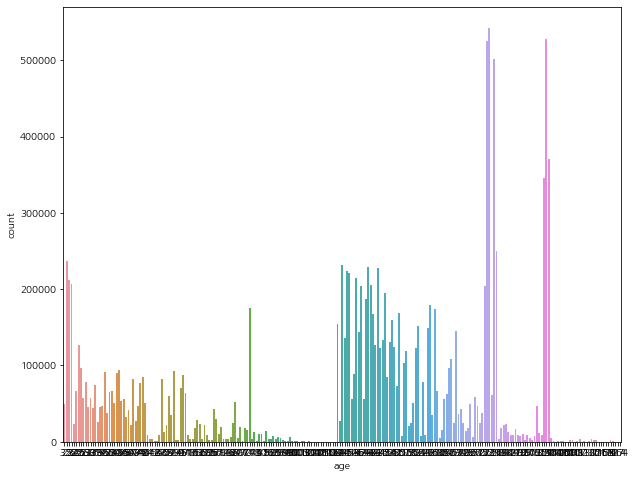

In [28]:
plt.figure(figsize = (10, 8))
sns.countplot(train["age"])
plt.show()

In [30]:
train["age"].value_counts()

# 고객들의 나이.. 100이 넘어가는건 무엇일까..

23     542682
24     527526
22     524620
21     500941
20     370847
        ...  
116        12
163         8
127         8
164         3
126         3
Name: age, Length: 235, dtype: int64

In [31]:
train["fecha_alta"].value_counts()

2014-07-28    57389
2014-10-03    54287
2014-08-04    45746
2013-10-14    40804
2013-08-03    33414
              ...  
1995-04-29       11
2015-05-31        9
2014-05-01        7
2010-07-04        4
2009-12-25        4
Name: fecha_alta, Length: 6756, dtype: int64

In [32]:
train["ind_nuevo"].value_counts()

# 최근 6개월내에 등록된 고객은 1

0.0    12808368
1.0      811207
Name: ind_nuevo, dtype: int64